## Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
data = pd.read_csv("D:\\DATA\\Naive Bayes\\diabetes.csv")

## Analyze Data

In [3]:
data.shape

(768, 9)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

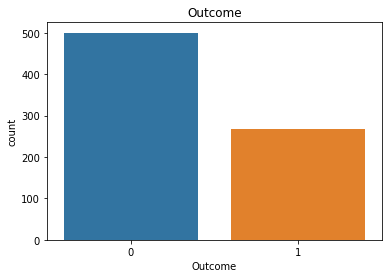

In [7]:
sb.countplot(x = 'Outcome', data = data)
plt.title("Outcome")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021207BD3748>,
      dtype=object)

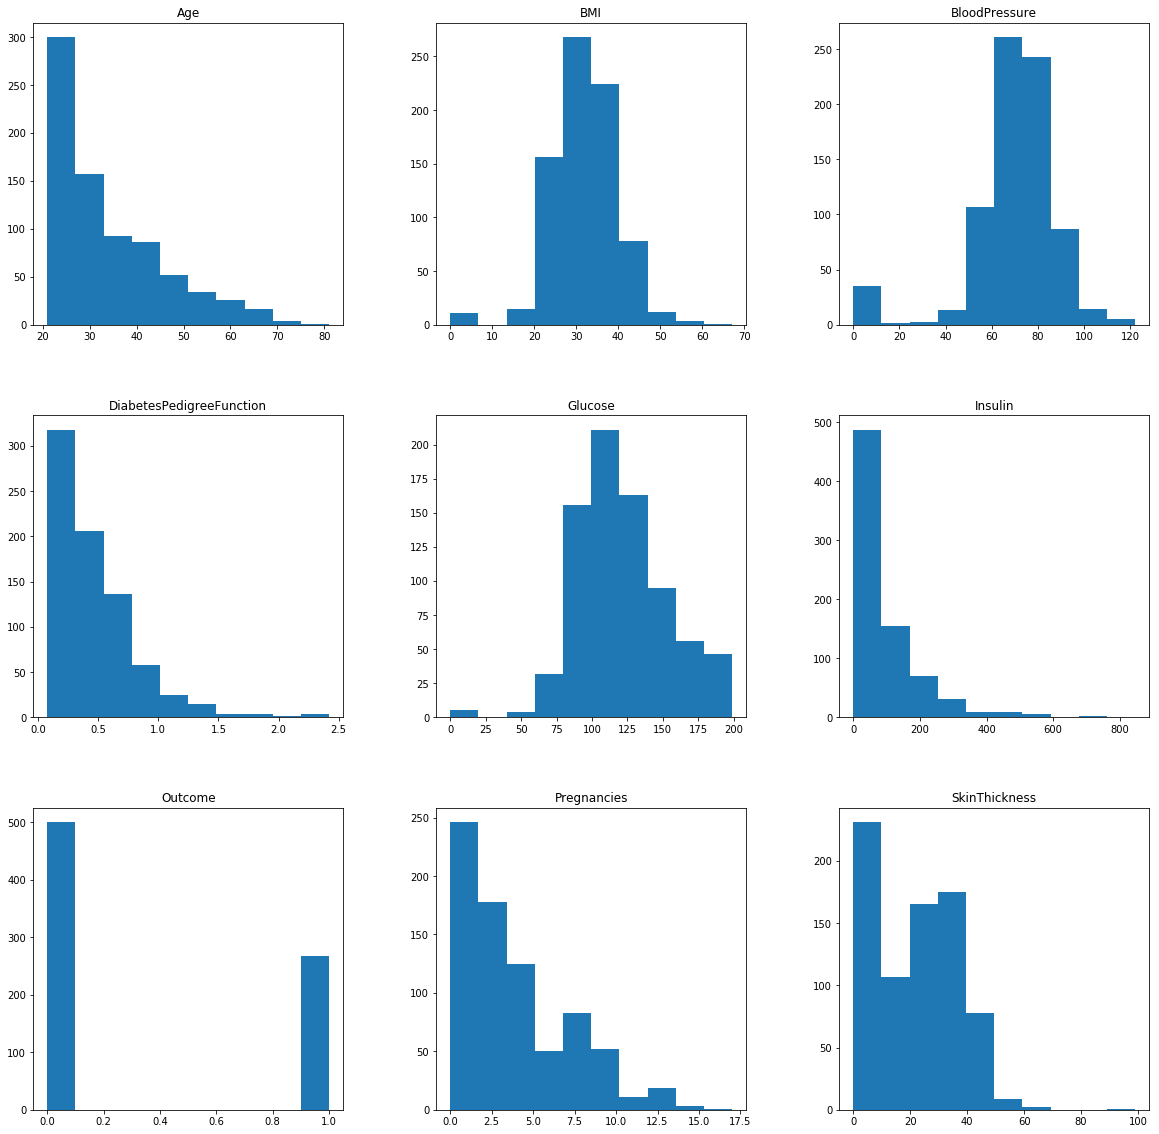

In [8]:
data.hist(figsize = (20, 20), grid = False)

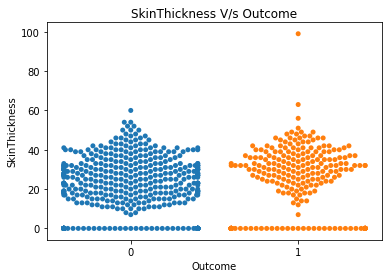

In [9]:
sb.swarmplot(x = data.Outcome, y = data.SkinThickness, data = data)
plt.title('SkinThickness V/s Outcome')
plt.show()

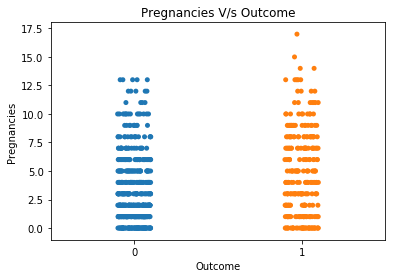

In [10]:
sb.stripplot(x = data.Outcome, y = data.Pregnancies, data = data)
plt.title('Pregnancies V/s Outcome')
plt.show()

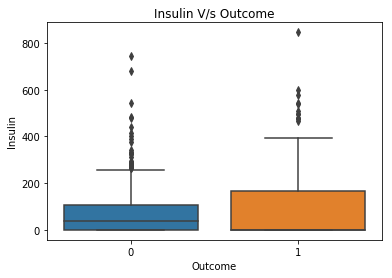

In [11]:
sb.boxplot(x = data.Outcome, y = data.Insulin, data = data)
plt.title('Insulin V/s Outcome')
plt.show()

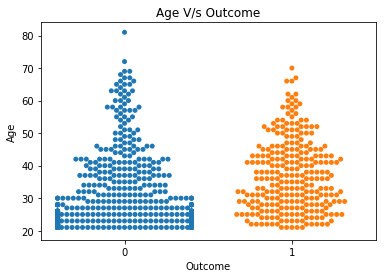

In [12]:
sb.swarmplot(x = 'Outcome', y =  'Age', data = data)
plt.title('Age V/s Outcome')
plt.show()

## Split data

In [13]:
X = data.drop('Outcome', axis = 1)
y = data.Outcome

In [14]:
print(X.head())
print('\n\n')
print(y.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) 

## Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

In [18]:
GNBModel = GaussianNB()

In [19]:
GNBModel.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
GNBModelPredict = GNBModel.predict(X_test)

## Evaluation


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Classification Report

In [22]:
print(classification_report(GNBModelPredict, y_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.60      0.63        81

   micro avg       0.75      0.75      0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



### Confusion Matrix

In [23]:
print(confusion_matrix(GNBModelPredict, y_test))

[[124  26]
 [ 32  49]]


### Accuracy

In [24]:
print(accuracy_score(GNBModelPredict, y_test))

0.7489177489177489
